In [ ]:
# oos = out of school data, a = net attendance data, c = completion rate data
# pri = primary, lower secondary = lsec, upper secondary = usec
# g = gender, w = wealth, f = female, m = male

In [ ]:
# https://data.unicef.org/resources/dataset/education-data/

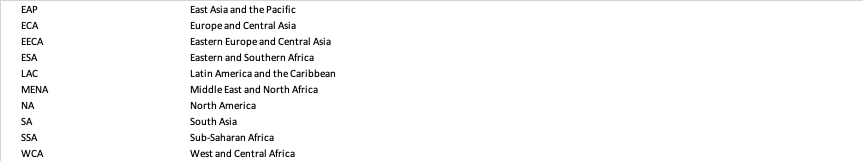

## Cleaning Data

In [ ]:
def cleanData(sheet, grade):
  g_ISO3 = []
  w_ISO3 = []
  g_country = []
  w_country = []
  g_region = []
  w_region = []
  devregion = []
  f_data = []
  m_data = []
  w_data = []
  g_grade = []
  w_grade = []
  w_level = []

  # extracting data and adding to specific lists
  for row in sheet['A3':'P205']:
    g_ISO3.append(row[0].value)
    g_country.append(row[1].value)
    g_region.append(row[2].value)
    g_grade.append(grade)
    devregion.append(row[4].value)
    if row[6].value == None:
      f_data.append(row[6].value)
    else:
      f_data.append(int(row[6].value))
    if row[7].value == None:
      m_data.append(row[7].value)
    else:
      m_data.append(int(row[7].value))
    w_ISO3.append(row[0].value)
    w_country.append(row[1].value)
    w_region.append(row[2].value)
    w_grade.append(grade)
    w_level.append('Poorest')
    if row[10].value == None:
      w_data.append(row[10].value)
    else:
      w_data.append(int(row[10].value))
    w_ISO3.append(row[0].value)
    w_country.append(row[1].value)
    w_region.append(row[2].value)
    w_grade.append(grade)
    w_level.append('Second')
    if row[11].value == None:
      w_data.append(row[11].value)
    else:
      w_data.append(int(row[11].value))
    w_ISO3.append(row[0].value)
    w_country.append(row[1].value)
    w_region.append(row[2].value)
    w_grade.append(grade)
    w_level.append('Middle')
    if row[12].value == None:
      w_data.append(row[12].value)
    else:
      w_data.append(int(row[12].value))
    w_ISO3.append(row[0].value)
    w_country.append(row[1].value)
    w_region.append(row[2].value)
    w_grade.append(grade)
    w_level.append('Fourth')
    if row[13].value == None:
      w_data.append(row[13].value)
    else:
      w_data.append(int(row[13].value))
    w_ISO3.append(row[0].value)
    w_country.append(row[1].value)
    w_region.append(row[2].value)
    w_grade.append(grade)
    w_level.append('Richest')
    if row[14].value == None:
      w_data.append(row[14].value)
    else:
      w_data.append(int(row[14].value))

  # creating dictionaries out of the lists
  g_dict = {'ISO3': g_ISO3, 'Country': g_country, 'Region': g_region, 'Development Regions': devregion, 'Female': f_data, 'Male': m_data, 'Grade': g_grade}
  w_dict = {'ISO3': w_ISO3, 'Country': w_country, 'Region': w_region, 'Wealth': w_data, 'Wealth Level': w_level, 'Grade': w_grade}


  return g_dict, w_dict

In [ ]:
def combineGradesData(pri_g_dict, pri_w_dict, lsec_g_dict, lsec_w_dict, usec_g_dict, usec_w_dict):
  # combining lists from each of the dictionaries for each grade level
  g_ISO3 = pri_g_dict['ISO3'] + lsec_g_dict['ISO3'] + usec_g_dict['ISO3'];
  g_country = pri_g_dict['Country'] + lsec_g_dict['Country'] + usec_g_dict['Country'];
  g_region = pri_g_dict['Region'] + lsec_g_dict['Region'] + usec_g_dict['Region'];
  f_data = pri_g_dict['Female'] + lsec_g_dict['Female'] + usec_g_dict['Female'];
  m_data = pri_g_dict['Male'] + lsec_g_dict['Male'] + usec_g_dict['Male'];
  g_grade = pri_g_dict['Grade'] + lsec_g_dict['Grade'] + usec_g_dict['Grade'];

  w_ISO3 = pri_w_dict['ISO3'] + lsec_w_dict['ISO3'] + usec_w_dict['ISO3'];
  w_country = pri_w_dict['Country'] + lsec_w_dict['Country'] + usec_w_dict['Country'];
  w_region = pri_w_dict['Region'] + lsec_w_dict['Region'] + usec_w_dict['Region'];
  w_data = pri_w_dict['Wealth'] + lsec_w_dict['Wealth'] + usec_w_dict['Wealth'];
  w_level = pri_w_dict['Wealth Level'] + lsec_w_dict['Wealth Level'] + usec_w_dict['Wealth Level'];
  w_grade = pri_w_dict['Grade'] + lsec_w_dict['Grade'] + usec_w_dict['Grade'];

  # creating on dictionary for all combined gender or wealth data
  g_dict = {'ISO3': g_ISO3, 'Country': g_country, 'Region': g_region, 'Female': f_data, 'Male': m_data, 'Grade': g_grade}
  w_dict = {'ISO3': w_ISO3, 'Country': w_country, 'Region': w_region, 'Wealth': w_data, 'Wealth Level': w_level, 'Grade': w_grade}

  return g_dict, w_dict

### Opening Each File

In [ ]:
# Out of School
# cleaning data from the Out of School file using the cleanData and combineGradesData functions
import openpyxl
oos_wb = openpyxl.load_workbook('Out_of_school_rate_2022_formatted.xlsx')

sheet = oos_wb['Primary']
oos_pri_g_dict, oos_pri_w_dict = cleanData(sheet, 'Primary')
# print(oos_pri_g_dict)

sheet = oos_wb['Lower secondary']
oos_lsec_g_dict, oos_lsec_w_dict = cleanData(sheet, 'Lower Secondary')
# print(oos_lsec_g_dict)

sheet = oos_wb['Upper secondary']
oos_usec_g_dict, oos_usec_w_dict = cleanData(sheet, 'Upper Secondary')
# print(oos_usec_g_dict)

oos_g_dict, oos_w_dict = combineGradesData(oos_pri_g_dict, oos_pri_w_dict, oos_lsec_g_dict, oos_lsec_w_dict, oos_usec_g_dict, oos_usec_w_dict)

In [ ]:
# Completion Rate
# cleaning data from the Completion Rate file using the cleanData and combineGradesData functions
import openpyxl
c_wb = openpyxl.load_workbook('Completion_rate_2022_formatted.xlsx')

sheet = c_wb['Primary']
c_pri_g_dict, c_pri_w_dict = cleanData(sheet, 'Primary')
# print(c_pri_g_dict)

sheet = c_wb['Lower secondary']
c_lsec_g_dict, c_lsec_w_dict = cleanData(sheet, 'Lower Secondary')
# print(c_lsec_g_dict)

sheet = c_wb['Upper secondary']
c_usec_g_dict, c_usec_w_dict = cleanData(sheet, 'Upper Secondary')
# print(c_usec_g_dict)

c_g_dict, c_w_dict = combineGradesData(c_pri_g_dict, c_pri_w_dict, c_lsec_g_dict, c_lsec_w_dict, c_usec_g_dict, c_usec_w_dict)

In [ ]:
# Attendance Rate
# cleaning data from the Attendance Rate file using the cleanData and combineGradesData functions
import openpyxl
a_wb = openpyxl.load_workbook('Adjusted_net_attendance_rate_2022_formatted.xlsx')

sheet = a_wb['Primary']
a_pri_g_dict, a_pri_w_dict = cleanData(sheet, 'Primary')
# print(a_pri_g_dict)

sheet = a_wb['Lower secondary']
a_lsec_g_dict, a_lsec_w_dict = cleanData(sheet, 'Lower Secondary')
# print(a_lsec_g_dict)

sheet = a_wb['Upper secondary']
a_usec_g_dict, a_usec_w_dict = cleanData(sheet, 'Upper Secondary')
# print(a_usec_g_dict)

a_g_dict, a_w_dict = combineGradesData(a_pri_g_dict, a_pri_w_dict, a_lsec_g_dict, a_lsec_w_dict, a_usec_g_dict, a_usec_w_dict)

## Female/Male - Attendance/Completion/Out of School Rates

In [ ]:
# Female
import plotly.express as px
import pandas as pd

# creating an individual dictionary and data frame for females and males
female_rates_dict = {'ISO3': a_g_dict['ISO3'], 'Country': a_g_dict['Country'], 'Region': a_g_dict['Region'], 'Grade': a_g_dict['Grade'], 'Out of School Rate': oos_g_dict['Female'], 'Attendance Rate': a_g_dict['Female'], 'Completion Rate': c_g_dict['Female']}
female_rates_df = pd.DataFrame(female_rates_dict)

male_rates_dict = {'ISO3': a_g_dict['ISO3'], 'Country': a_g_dict['Country'], 'Region': a_g_dict['Region'], 'Grade': a_g_dict['Grade'], 'Out of School Rate': oos_g_dict['Male'], 'Attendance Rate': a_g_dict['Male'], 'Completion Rate': c_g_dict['Male']}
male_rates_df = pd.DataFrame(male_rates_dict)

# creating two figures - one for females, one for males - to display attendance and completion rate data
f_ac_fig = px.scatter(female_rates_df, x="Attendance Rate", y="Completion Rate", color="Region", hover_name="Country", facet_col="Grade", title='Female Students\' School Completion Rates versus Attendance Rates')
f_ac_fig.show()

m_ac_fig = px.scatter(male_rates_df, x="Attendance Rate", y="Completion Rate", color="Region", hover_name="Country", facet_col="Grade", title='Male Students\' School Completion Rates versus Attendance Rates')
m_ac_fig.show()

Gender - Attendance versus Completion Rate

There are two scatter plots--one for female and one for male--that plot the Attendance Rate versus the Completion Rate for each gender in every country. Hovering over each point allows the user to see what country the point is depicting and its data. The points on the plot are colored to display the region of the world that the country is in. The facet columns split up the data by grade level in order to compare the trends by school level as well.

In [ ]:
# INTERACTIVITY
# makes the figures interactive by allowing the user to select
# if they want to view the Male or Female data
gender = "Female" #@param ["Female", "Male"]
if gender == 'Female':
  f_ac_fig.show()
elif gender == 'Male':
  m_ac_fig.show()

In [ ]:
import plotly.io as pio

# creating html files for the two figures
fh = open('f_ac_embed.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

fh = open('m_ac_embed.html', 'w')
fh.close()

pio.write_html(f_ac_fig, file='f_ac_embed.html', auto_open=True, full_html=True)
pio.write_html(m_ac_fig, file='m_ac_embed.html', auto_open=True, full_html=True)

In [ ]:
import plotly.express as px

# creating two figures - one for females, one for males - to display out of school rate data on choropleths
f_oos_fig = px.choropleth(female_rates_df, locations='ISO3', color='Out of School Rate', hover_name='Country', animation_frame='Grade', title='Female Students\' Out of School Rates')
f_oos_fig.show()

m_oos_fig = px.choropleth(male_rates_df, locations='ISO3', color='Out of School Rate', hover_name='Country', animation_frame='Grade', title='Male Students\' Out of School Rates')
m_oos_fig.show()

Gender - Out of School Rate

The two choropleths depict the out of school rates per country for females and males. The color of the country corresponds to a range from 0-100%, depicting the rate for each country. Hovering above each country allows the user to see the country name and data. The animation frame allows the user to switch between school level so they can see how the trend acts depending on age.

In [ ]:
# INTERACTIVITY
# makes the figures interactive by allowing the user to select
# if they want to view the Male or Female data
gender = "Male" #@param ["Female", "Male"]
if gender == 'Female':
  f_oos_fig.show()
elif gender == 'Male':
  m_oos_fig.show()

In [ ]:
import plotly.io as pio

# creating html files for the two figures
fh = open('f_oos_embed.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

fh = open('m_oos_embed.html', 'w')
fh.close()

pio.write_html(f_oos_fig, file='f_oos_embed.html', auto_open=True, full_html=True) # preferred method
pio.write_html(m_oos_fig, file='m_oos_embed.html', auto_open=True, full_html=True)

## Wealth - Attendance/Completion/Out of School Rates

In [ ]:
# Wealth
import plotly.express as px
import pandas as pd

# creating a dictionary and data fram for the wealth data
wealth_rates_dict = {'ISO3': a_w_dict['ISO3'], 'Country': a_w_dict['Country'], 'Region': a_w_dict['Region'], 'Grade': a_w_dict['Grade'], 'Wealth Level': a_w_dict['Wealth Level'], 'Out of School Rate': oos_w_dict['Wealth'], 'Attendance Rate': a_w_dict['Wealth'], 'Completion Rate': c_w_dict['Wealth']}
wealth_rates_df = pd.DataFrame(wealth_rates_dict)

# creating two figures - one plotting attendance rate against completion rate, one displaying out of school rate on a choropleth - differentiating between wealth level
wealth_ac_fig = px.scatter(wealth_rates_df, x="Attendance Rate", y="Completion Rate", color="Region", hover_name="Country", facet_col="Wealth Level", animation_frame='Grade', title='Student School Completion Rates verus Attendance Rates by Wealth Quintile')
wealth_ac_fig.show()

wealth_oos_fig = px.choropleth(wealth_rates_df, locations='ISO3', color='Out of School Rate', hover_name='Country', animation_frame='Wealth Level', facet_col='Grade', title='Student Out of School Rates by Wealth Quintile')
wealth_oos_fig.show()

Wealth - Attendance versus Completion Rate

The figure includes five separate scatter plots, each once again plotting Attendance Rate versus the Completion Rate for every country. Each facet column displays the rates for one of the wealth quintiles (categorized by UNICEF). Comparing each column allows the user to see how the rates change depending on the wealth of the student. Once again, the color of each point corresponds the global region that the country can be found in. Hovering above the point allows the user to see the country name and data. The animation frame allows the user to switch between school level so they can also see how the trend changes depending on age.

Wealth - Out of School Rate

The figure includes three separate choropleths, one for each grade level, depicting the Out-of-School Rates of the students. The animation frame allows the user to switch between wealth level so they can see how the rates change depending on wealth. Hovering above the country allows the user to see the country name and data. The color of the country corresponds to a range from 0-100%, depicting the rate for each country.

In [ ]:
import plotly.io as pio

# creating html files for the two figures
fh = open('w_ac_embed.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

fh = open('w_oos_embed.html', 'w')
fh.close()

pio.write_html(wealth_ac_fig, file='w_ac_embed.html', auto_open=True, full_html=True) # preferred method
pio.write_html(wealth_oos_fig, file='w_oos_embed.html', auto_open=True, full_html=True)

## Development Regions

In [ ]:
import openpyxl
# extracting developmental region data
a_wb = openpyxl.load_workbook('Adjusted_net_attendance_rate_2022_formatted.xlsx')
sheet = a_wb['Primary']

ISO3 = []
country = []
devregion = []

# extracts only data from countries that have gender/wealth data in the file
for row in sheet['A3':'P205']:
  if not(row[15].value == ''):
    ISO3.append(row[0].value)
    country.append(row[1].value)
    devregion.append(row[4].value)

# creates a developmental region dictionary to combine all the lists
dev_dict = {'ISO3': ISO3, 'Country': country, 'Development Regions': devregion}

In [ ]:
import plotly.express as px
import pandas as pd

# creates a data frame to be able to display the development regions on a choropleth
dev_df = pd.DataFrame(dev_dict)

# creates a choropleth to display development regions through color
fig = px.choropleth(dev_df, locations='ISO3', color='Development Regions',
                    hover_name='Country', title='Countries\' Developmental Classification by UNICEF')
fig.show()

Developmental Region Choropleth

The choropleth displays the UNICEF's categorization of each country in three different developmental regions. This once again shows the country's wealth status. We have also only included the data of the countries that the other data sets have data for so the user can see which countries we will be analyzing (mainly those in South America, Africa, and Asia).

In [ ]:
import plotly.io as pio

# creating html files for the figure
fh = open('dev_reg_embed.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig, file='dev_reg_embed.html', auto_open=True, full_html=True) # preferred method

# Foundational Learning Skills

## Gender

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('Foundational-learning-2022-formatted.xlsx')

sheet = wb['Combined']

countries_lst = []
region_lst = []
age_grp_lst = []
sex_lst = []
reading_lst = []
numeracy_lst = []

# cleaning data and updating lists
for row in sheet['A3':'P140']:
  if not(row[3].value == 'Not Classified' or row[3].value == None):
    countries_lst.append(row[0].value)
    region_lst.append(row[1].value)
    age_grp_lst.append(row[4].value)
    if row[5].value == "Reading":
      sex_lst.append("Girls")
      reading_lst.append(row[7].value)
      sex_lst.append("Boys")
      reading_lst.append(row[8].value)
    elif row[5].value == "Numeracy":
      numeracy_lst.append(row[7].value)
      numeracy_lst.append(row[8].value)

# checking contents
print(countries_lst)
print(age_grp_lst)
print(sex_lst)
print(reading_lst)
print(numeracy_lst)

# checking lengths
print(len(countries_lst))
print(len(age_grp_lst))
print(len(sex_lst))
print(len(reading_lst))
print(len(numeracy_lst))

['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Chad', 'Chad', 'Chad', 'Chad', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Kiribati', 'Kiribati', 'Kiribati', 'Kiribati', 'Kyrgyzstan', 'Kyrgyzstan', 'Kyrgyzstan', 'Kyrgyzstan', 'Lesotho', 'Lesotho', 'Lesotho', 'Lesotho', 'Madagascar', 'Madagascar', 'Madagascar', 'Madagascar', 'Malawi', 'Malawi', 'Malawi', 'Malawi', 'Mongolia', 'Mongolia', 'Mongolia', 'Mongolia', 'Nepal', 'Nepal', 'Nepal', 'Nepal', 'North Macedonia', 'North Macedonia', 'North Macedonia', 'North Macedonia', 'Pakistan (Azad Jammu and Kashmir)', 'Pakistan (Azad Jammu and 

In [ ]:
# creating dictionary
sex_dict = {'country': countries_lst,
            'region': region_lst,
            'age_grp': age_grp_lst,
            'sex': sex_lst,
            'percent_with_read_skills': reading_lst,
            'percent_with_num_skills': numeracy_lst}
print(sex_dict)

{'country': ['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Chad', 'Chad', 'Chad', 'Chad', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Gambia', 'Gambia', 'Gambia', 'Gambia', 'Ghana', 'Ghana', 'Ghana', 'Ghana', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Guinea-Bissau', 'Kiribati', 'Kiribati', 'Kiribati', 'Kiribati', 'Kyrgyzstan', 'Kyrgyzstan', 'Kyrgyzstan', 'Kyrgyzstan', 'Lesotho', 'Lesotho', 'Lesotho', 'Lesotho', 'Madagascar', 'Madagascar', 'Madagascar', 'Madagascar', 'Malawi', 'Malawi', 'Malawi', 'Malawi', 'Mongolia', 'Mongolia', 'Mongolia', 'Mongolia', 'Nepal', 'Nepal', 'Nepal', 'Nepal', 'North Macedonia', 'North Macedonia', 'North Macedonia', 'North Macedonia', 'Pakistan (Azad Jammu and Kashmir)', 'Pakistan (Aza

In [ ]:
# creating dataframe
import pandas as pd
sex_df = pd.DataFrame(sex_dict)
print(sex_df)

        country region      age_grp    sex  percent_with_read_skills  \
0    Bangladesh     SA    Grade 2/3  Girls                 26.002825   
1    Bangladesh     SA    Grade 2/3   Boys                 23.178070   
2    Bangladesh     SA  Age 7 to 14  Girls                 52.392544   
3    Bangladesh     SA  Age 7 to 14   Boys                 45.074005   
4       Belarus    ECA    Grade 2/3  Girls                 84.491585   
..          ...    ...          ...    ...                       ...   
127    Viet Nam    EAP  Age 7 to 14   Boys                 83.537285   
128    Zimbabwe    SSA    Grade 2/3  Girls                 21.219332   
129    Zimbabwe    SSA    Grade 2/3   Boys                 17.992134   
130    Zimbabwe    SSA  Age 7 to 14  Girls                 48.368660   
131    Zimbabwe    SSA  Age 7 to 14   Boys                 40.518608   

     percent_with_num_skills  
0                  12.392838  
1                  12.709662  
2                  28.959688  
3          

In [ ]:
# creating visualization
import plotly.express as px
import pandas as pd

fig_gender_skills = px.scatter(sex_df, x='percent_with_read_skills', y='percent_with_num_skills',
                 hover_name='country', facet_col='sex', animation_frame='age_grp', color='region',
                 title = 'Percentage of Children who Demonstrated Foundational Learning Skills by Gender',
                 labels = {'sex': 'Sex', 'age_grp': 'Age Group', 'region': 'Region',
                           'percent_with_read_skills': 'Percent w/ Reading Skills',
                           'percent_with_num_skills': 'Percent w/ Numeracy Skills'})

fig_gender_skills.show()

Gender - Foundational Learning Skills

The figure includes two scatter plots, one for girls and one for boys, plotting their Numeracy Skills mastery rates versus their Literacy Skills mastery rates. The color of each point once again corresponds to the country's global region and hovering above each point displays to the user the country's name and data. The animation frame switches between two age groups to allow the user to see how the trend changes by age.

In [ ]:
import plotly.io as pio

fh = open('gender_skills_embed.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig_gender_skills, file='gender_skills_embed.html', auto_open=True, full_html=True) # preferred method

## Wealth

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('Foundational-learning-2022-formatted.xlsx')

sheet = wb['Combined']

countries_lst = []
region_lst = []
age_grp_lst = []
reading_lst = []
numeracy_lst = []
wealth_quintile_lst = []

# cleaning data and updating lists
for row in sheet['A3':'P140']:
  if not(row[3].value == 'Not Classified' or row[3].value == None):
    if row[5].value == "Reading":
      for i in range(5):
        countries_lst.append(row[0].value)
        region_lst.append(row[1].value)
        age_grp_lst.append(row[4].value)
      wealth_quintile_lst.append("Poorest")
      reading_lst.append(row[11].value)
      wealth_quintile_lst.append("Second")
      reading_lst.append(row[12].value)
      wealth_quintile_lst.append("Middle")
      reading_lst.append(row[13].value)
      wealth_quintile_lst.append("Fourth")
      reading_lst.append(row[14].value)
      wealth_quintile_lst.append("Richest")
      reading_lst.append(row[15].value)
    elif row[5].value == "Numeracy":
      numeracy_lst.append(row[11].value)
      numeracy_lst.append(row[12].value)
      numeracy_lst.append(row[13].value)
      numeracy_lst.append(row[14].value)
      numeracy_lst.append(row[15].value)

# checking contents
print(countries_lst)
print(age_grp_lst)
print(wealth_quintile_lst)
print(reading_lst)
print(numeracy_lst)

# checking lengths
print(len(countries_lst))
print(len(age_grp_lst))
print(len(wealth_quintile_lst))
print(len(reading_lst))
print(len(numeracy_lst))

['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Gambia', 'Gambia', 'Gambia',

In [ ]:
# creating dictionary
wealth_dict = {'country': countries_lst,
               'region': region_lst,
               'age_grp': age_grp_lst,
               'wealth_quintile': wealth_quintile_lst,
               'percent_with_read_skills': reading_lst,
               'percent_with_num_skills': numeracy_lst}
print(wealth_dict)

{'country': ['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Belarus', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Central African Republic', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Chad', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Democratic Republic of the Congo', 'Gambia', 'Gambia

In [ ]:
# creating dataframe
import pandas as pd
wealth_df = pd.DataFrame(wealth_dict)
print(wealth_df)

        country region      age_grp wealth_quintile  percent_with_read_skills  \
0    Bangladesh     SA    Grade 2/3         Poorest                 16.602999   
1    Bangladesh     SA    Grade 2/3          Second                 18.201494   
2    Bangladesh     SA    Grade 2/3          Middle                 22.767086   
3    Bangladesh     SA    Grade 2/3          Fourth                 28.660402   
4    Bangladesh     SA    Grade 2/3         Richest                 42.274563   
..          ...    ...          ...             ...                       ...   
325    Zimbabwe    SSA  Age 7 to 14         Poorest                 25.323767   
326    Zimbabwe    SSA  Age 7 to 14          Second                 34.230465   
327    Zimbabwe    SSA  Age 7 to 14          Middle                 44.128292   
328    Zimbabwe    SSA  Age 7 to 14          Fourth                 56.616516   
329    Zimbabwe    SSA  Age 7 to 14         Richest                 76.777069   

     percent_with_num_skill

In [ ]:
# creating visualization
import plotly.express as px
import pandas as pd

fig_wealth_skills = px.scatter(wealth_df, x='percent_with_read_skills', y='percent_with_num_skills',
                 hover_name='country', facet_col='wealth_quintile', animation_frame='age_grp',
                 color='region', title='Percentage of Children who Demonstrated Foundational Learning Skills by Wealth Quintile',
                 labels = {'percent_with_read_skills': 'Percent w/ Reading Skills',
                           'percent_with_num_skills': 'Percent w/ Numeracy Skills',
                           'region': 'Region', 'age_grp': 'Age Group', 'wealth_quintile': 'Wealth Quintile'})

fig_wealth_skills.show()

Wealth - Foundational Learning Skills

The figure includes five scatter plots, one for each wealth quintile, plotting their Numeracy Skills mastery rates versus their Literacy Skills mastery rates. The color of each point once again corresponds to the country's global region and hovering above each point displays to the user the country's name and data. The animation frame switches between two age groups to allow the user to see how the trend changes by age.

In [ ]:
import plotly.io as pio

fh = open('wealth_skills_embed.html', 'w') # this just creates a blank file, so that the write_html() function can write to this file later
fh.close()

pio.write_html(fig_wealth_skills, file='wealth_skills_embed.html', auto_open=True, full_html=True) # preferred method